# Predicting Interview Attendance

This is the data colleceted by a recruitement agency.
They tries to predict whether a candidate will turn up for an interview .
Dataset contains 2 years data between sep,2014 to jan 2017.
Recruiters deal with candidate(job seekers) and client(company who will recruite)
Following are the feature name:
* Date of Interview,
* Client name,
* Industry :- This refers to the vertical the client belongs(Note Candidates can jump across verticals in their job hunt)
* Location,
* Position to be closed :- Niche rare skill sets , routine common skill sets
* Nature of Skillset, This refers to the skill the client has and specifies the same
* Interview Type, 

There are three types of interviewWalk-in
drives :- these are 

Unscheduled. Candidates are either contacted or they come to the interview on their own volition,

Scheduled:- Here the candidates profiles are screened by the client and subsequent to this, the vendor fixes an appointment between the client and the candidate.

Scheduled walk-in.:- Here the number of candidates is larger and the candidates are informed beforehand of a tentative date to ascertain their availability. The profiles are screened as in a scheduled interview. In a sense it bears features of both a walk-in and a scheduled interview 

* Name(Cand ID)
* Gender
* Candidate Current Location
* Candidate Job Location
* Interview Venue
* Candidate Native location
* Have you obtained the necessary permission to start at the required time
* Hope there will be no unscheduled meetings
* Can I Call you three hours before the interview and follow up on your attendance for the interview
* Can I have an alternative number/ desk number
* I assure you that I will not trouble you too much,
* Have you taken a printout of your updated resume?
* Have you read the JD and understood the same?
* Are you clear with the venue details and the landmark?
* Has the call letter been shared
* Expected Attendance: Whether the candidate was expected to attend the interview. Here the it is either yes no or uncertain
* Observed Attendance: Whether the candidate attended the interview. This is binary and will form our dependent variable
* Marital Status 

## Import the necessary libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
plt.style.use('fivethirtyeight')
%matplotlib inline

## Load the data into dataframe

In [2]:
interview_df = pd.read_csv('Interview.csv', delimiter=',')

## Understanding the data

In [3]:
interview_df

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,Yes,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,Yes,Yes,Uncertain,No,Married,NaN,NaN,NaN,NaN,NaN
5,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 6,Male,Gurgaon,...,Yes,Yes,Yes,Yes,Single,NaN,NaN,NaN,NaN,NaN
6,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 7,Male,Gurgaon,...,Yes,Yes,Yes,Yes,Single,NaN,NaN,NaN,NaN,NaN
7,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 8,Female,Gurgaon,...,Yes,Yes,Yes,Yes,Single,NaN,NaN,NaN,NaN,NaN
8,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 9,Male,Gurgaon,...,Yes,Yes,Yes,Yes,Single,NaN,NaN,NaN,NaN,NaN
9,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 10,Female,Gurgaon,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN


**Dropping the columns that are not required for data analysis.**

In [4]:
interview_df.drop(['Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Name(Cand ID)'], 
                  axis=1, inplace=True)

In [5]:
interview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 22 columns):
Date of Interview                                                                                     1233 non-null object
Client name                                                                                           1234 non-null object
Industry                                                                                              1233 non-null object
Location                                                                                              1233 non-null object
Position to be closed                                                                                 1233 non-null object
Nature of Skillset                                                                                    1233 non-null object
Interview Type                                                                                        1233 non-null object
Gender                          

**Change the column names into something that is more readable.**

In [6]:
interview_df.columns = ['Date', 'Client', 'Industry', 'Location', 'Position', 'Skillset', 'Interview_Type', 
                     'Gender', 'Curr_Location', 'Job_Location', 'Venue', 'Native_Loc', 'Necc_Perm', 'No_random_meet', 
                      'Call_3_hours', 'Alternative_Number', 'Printout_resume', 'Details_Clear_Landmark', 
                      'Shared_Letter', 'Exp_Attendance', 'Ob_Attendance', 'Martial_Status']
interview_df.head()

,Date,Client,Industry,Location,Position,Skillset,Interview_Type,Gender,Curr_Location,Job_Location,...,Necc_Perm,No_random_meet,Call_3_hours,Alternative_Number,Printout_resume,Details_Clear_Landmark,Shared_Letter,Exp_Attendance,Ob_Attendance,Martial_Status
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Hosur,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Bangalore,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Chennai,...,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Chennai,...,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Bangalore,...,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married


In [7]:
interview_df.tail(3)

,Date,Client,Industry,Location,Position,Skillset,Interview_Type,Gender,Curr_Location,Job_Location,...,Necc_Perm,No_random_meet,Call_3_hours,Alternative_Number,Printout_resume,Details_Clear_Landmark,Shared_Letter,Exp_Attendance,Ob_Attendance,Martial_Status
1231,06.05.2016,Pfizer,Pharmaceuticals,Chennai,Niche,generic drugs – RA,Scheduled,Male,Chennai,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
1232,06.05.2016,Pfizer,Pharmaceuticals,Chennai,Niche,generic drugs – RA,Scheduled,Female,Chennai,Chennai,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Single
1233,NaN,﻿﻿,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The last row has been dropped as it only contained NaNs.**

In [8]:
interview_df.tail()
interview_df.drop(1233, inplace=True)
interview_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 0 to 1232
Data columns (total 22 columns):
Date                      1233 non-null object
Client                    1233 non-null object
Industry                  1233 non-null object
Location                  1233 non-null object
Position                  1233 non-null object
Skillset                  1233 non-null object
Interview_Type            1233 non-null object
Gender                    1233 non-null object
Curr_Location             1233 non-null object
Job_Location              1233 non-null object
Venue                     1233 non-null object
Native_Loc                1233 non-null object
Necc_Perm                 1029 non-null object
No_random_meet            986 non-null object
Call_3_hours              986 non-null object
Alternative_Number        986 non-null object
Printout_resume           985 non-null object
Details_Clear_Landmark    985 non-null object
Shared_Letter             988 non-null object
Exp_At

## Cleaning the data

In [9]:
for column in interview_df.columns:
    print(column, interview_df[column].unique())
    print('-'*40)

Date ['13.02.2015' '19.06.2015' '23.06.2015' '29.06.2015' '25.06.2015'
 '25.05.16' '25.5.2016' '25-05-2016' '25.05.2016' '25-5-2016' '04/12/16'
 '13.04.2016' '27.02.2016' '07.05.2016' '5.5.16' '4.5.16' '21.4.16'
 '22.4.16' '23.4.16' '15 Apr 16' '19 Apr 16' '20 Apr 16' '21-Apr -16'
 '22 -Apr -16' '25 – Apr-16' '25 Apr 16' '18 Apr 16' '11.5.16' '10.5.16'
 '11.05.16' '12.04.2016' '12.04.2017' '12.04.2018' '12.04.2019'
 '12.04.2020' '12.04.2021' '12.04.2022' '12.04.2023' '8.5.16' '7.5.16'
 '19.03.16' '24.05.2016' '05/11/2016' '26/05/2016' '10.05.2016'
 '28.08.2016 & 09.00 AM' '28.08.2016 & 9.30 AM' '28.8.2016 & 12.00 PM'
 '28.08.2016 & 09.30 AM' '28.8.2016 & 10.30 AM' '28.8.2016 & 09.30 AM'
 '28.8.2016 & 04.00 PM' '28.08.2016 & 11.30 AM' '28.08.2016 & 11.00 AM'
 '28.08.2016 & 10.30 AM' '28.8.2016 & 03.00 PM' '28.08.2016 & 10.00 AM'
 '28.8.2016 & 02.00 PM' '28.8.2016 & 11.00 AM' '13.06.2016' '02.09.2016'
 '02.12.2015' '23.02.2016' '22.03.2016' '26.02.2016' '06.02.2016'
 '21.4.2016' '21/04/1

**The following columns were dropped as the data was too messy or seemed irrelevant.**

* **Skillset** was dropped as it had a lot of diverse data and felt that Position attribute would be sufficient.

* **Native location** was dropped and greater importance was given to current location.

In [10]:
interview_df.drop(['Date', 'Skillset', 'Native_Loc', 'Alternative_Number'], axis=1, inplace=True)

**Replaced the keywords that were similar across all columns.**

In [11]:
interview_df.Client.replace(['Aon Hewitt', 'Hewitt', 'Aon hewitt Gurgaon'], 'Hewitt', inplace=True)
interview_df.Client.replace(['Standard Chartered Bank', 'Standard Chartered Bank Chennai'], 
                            'Standard Chartered', inplace=True)

interview_df.Industry.replace(['IT Services', 'IT Products and Services', 'IT'], 
                              'IT', inplace=True)

interview_df.Location.replace(['chennai', 'Chennai', 'chennai ', 'CHENNAI'], 'Chennai', inplace=True)
interview_df.Location.replace('- Cochin- ', 'Cochin', inplace=True)
interview_df.Location.replace('Gurgaonr', 'Gurgaon', inplace=True)

interview_df.Curr_Location.replace(['chennai', 'Chennai', 'chennai ', 'CHENNAI'], 'Chennai', inplace=True)
interview_df.Curr_Location.replace('- Cochin- ', 'Cochin', inplace=True)

interview_df.Job_Location.replace('- Cochin- ', 'Cochin', inplace=True)

interview_df.Venue.replace('- Cochin- ', 'Cochin', inplace=True)

interview_df.Exp_Attendance.fillna('yes', inplace=True)
interview_df.Exp_Attendance.replace(['Yes', '10.30 Am', '11:00 AM'], 'yes', inplace=True)
interview_df.Exp_Attendance.replace(['No', 'NO'], 'no', inplace=True)

interview_df.Ob_Attendance.replace(['Yes', 'yes '], 'yes', inplace=True)
interview_df.Ob_Attendance.replace(['No', 'NO', 'No ', 'no '], 'no', inplace=True)

interview_df.Printout_resume.replace('Yes', 'yes', inplace=True)
interview_df.Printout_resume.replace(['No', 'Not yet', 'na', 'Na', 'Not Yet', 
                                      'No- will take it soon'], 'no',inplace=True)

interview_df.Necc_Perm.replace(['Yes', 'yes'], 'yes', inplace=True)
interview_df.Necc_Perm.replace(['No', 'Not yet', 'NO', 'Na', 'Yet to confirm'] ,'no', inplace=True)

interview_df.Details_Clear_Landmark.replace(['Yes', 'yes'], 'yes', inplace=True)
interview_df.Details_Clear_Landmark.replace(['No', 'na', 'no', 'Na', 'No- I need to check'] ,'no', inplace=True)

interview_df.Interview_Type.replace(['Scheduled Walk In', 'Scheduled ', 'Scheduled Walk In', 'Sceduled walkin'],
                                    'Scheduled', inplace=True)
interview_df.Interview_Type.replace(['Walkin '], 'Walkin', inplace=True)

interview_df.No_random_meet.replace(['Yes', 'yes'], 'yes', inplace=True)
interview_df.No_random_meet.replace(['Na', 'No', 'Not Sure', 'cant Say', 'Not sure'] ,'no', inplace=True)

interview_df.Call_3_hours.replace(['No', 'No Dont', 'Na'], 'no', inplace=True)
interview_df.Call_3_hours.replace(['Yes', 'yes'], 'yes', inplace=True)

interview_df.Shared_Letter.replace(['Yes', 'yes'], 'yes', inplace=True)
interview_df.Shared_Letter.replace(['Havent Checked', 'No', 'Need To Check', 'Not sure', 
                                   'Yet to Check','Not Sure', 'Not yet', 'no', 'na', 'Na'], 'no', inplace=True)

In [12]:
interview_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 0 to 1232
Data columns (total 18 columns):
Client                    1233 non-null object
Industry                  1233 non-null object
Location                  1233 non-null object
Position                  1233 non-null object
Interview_Type            1233 non-null object
Gender                    1233 non-null object
Curr_Location             1233 non-null object
Job_Location              1233 non-null object
Venue                     1233 non-null object
Necc_Perm                 1029 non-null object
No_random_meet            986 non-null object
Call_3_hours              986 non-null object
Printout_resume           985 non-null object
Details_Clear_Landmark    985 non-null object
Shared_Letter             988 non-null object
Exp_Attendance            1233 non-null object
Ob_Attendance             1233 non-null object
Martial_Status            1233 non-null object
dtypes: object(18)
memory usage: 183.0+ KB


In [13]:
interview_df.head()

,Client,Industry,Location,Position,Interview_Type,Gender,Curr_Location,Job_Location,Venue,Necc_Perm,No_random_meet,Call_3_hours,Printout_resume,Details_Clear_Landmark,Shared_Letter,Exp_Attendance,Ob_Attendance,Martial_Status
0,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Scheduled Walkin,Male,Chennai,Hosur,Hosur,yes,yes,yes,yes,yes,yes,yes,no,Single
1,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Scheduled Walkin,Male,Chennai,Bangalore,Hosur,yes,yes,yes,yes,yes,yes,yes,no,Single
2,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Scheduled Walkin,Male,Chennai,Chennai,Hosur,NaN,no,NaN,NaN,NaN,NaN,Uncertain,no,Single
3,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Scheduled Walkin,Male,Chennai,Chennai,Hosur,yes,yes,no,no,yes,yes,Uncertain,no,Single
4,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Scheduled Walkin,Male,Chennai,Bangalore,Hosur,yes,yes,yes,yes,yes,yes,Uncertain,no,Married


## Handling the missing data

### Printout of Resume

Whether the candidate has taken a printout has been converted into a binary variable.

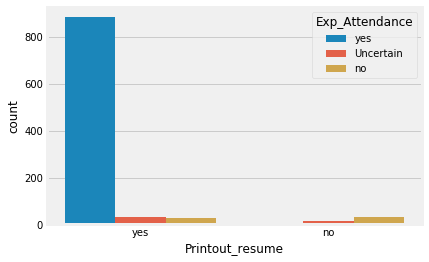

In [14]:
sns.countplot(x=interview_df.Printout_resume, hue=interview_df.Exp_Attendance)

Comparitively, people who chose not to attend the interview didn't take the printout

In [15]:
index_nan_print = interview_df['Printout_resume'][interview_df['Printout_resume'].isnull()].index
for i in index_nan_print:
    
    if interview_df.iloc[i]['Exp_Attendance'] == 'no':
        interview_df.iloc[i]['Printout_resume'] = 'no'
    else:
        interview_df.iloc[i]['Printout_resume'] = 'yes'

### Necessary Permissions

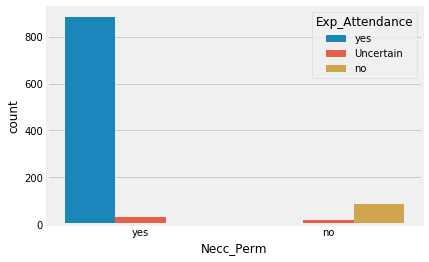

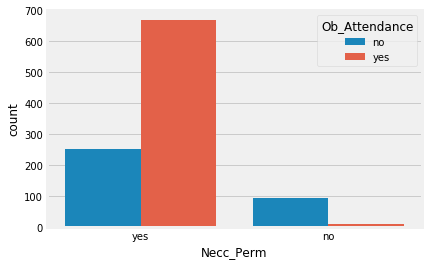

In [16]:
sns.countplot(x=interview_df.Necc_Perm, hue=interview_df.Exp_Attendance)
plt.show()
sns.countplot(x=interview_df.Necc_Perm, hue=interview_df.Ob_Attendance)

* People who were certain of not attending the interview didn't take the necessary permissions. Hence, the same was chosen while filling the missing data.

In [17]:
index_nan_perm = interview_df['Necc_Perm'][interview_df['Necc_Perm'].isnull()].index
for i in index_nan_perm:
    
    if interview_df.iloc[i]['Exp_Attendance'] == 'no':
        interview_df.iloc[i]['Necc_Perm'] = 'no'
    else:
        interview_df.iloc[i]['Necc_Perm'] = 'yes'

### Landmark Details

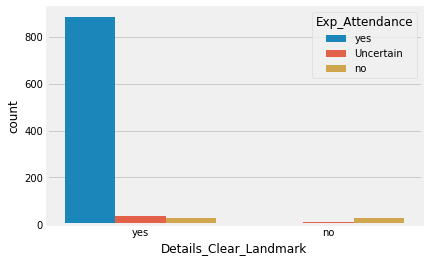

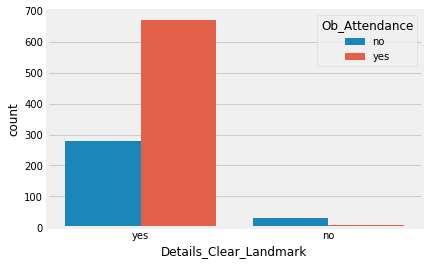

In [18]:
sns.countplot(x=interview_df.Details_Clear_Landmark, hue=interview_df.Exp_Attendance)
plt.show()
sns.countplot(x=interview_df.Details_Clear_Landmark, hue=interview_df.Ob_Attendance)

The attribute was set to 'no' if the candidate was not expected to attend the interview.

In [19]:
index_nan_details = interview_df['Details_Clear_Landmark'][interview_df['Details_Clear_Landmark'].isnull()].index
for i in index_nan_details:
    
    if (interview_df.iloc[i]['Exp_Attendance'] == 'no'):
        interview_df.iloc[i]['Details_Clear_Landmark'] = 'no'
    else:
        interview_df.iloc[i]['Details_Clear_Landmark'] = 'yes'

**Similarly, the other three attributes were filled based on Observed Attendance and Expected Attendance.**

### Random Meetings

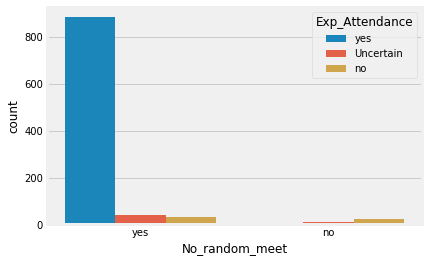

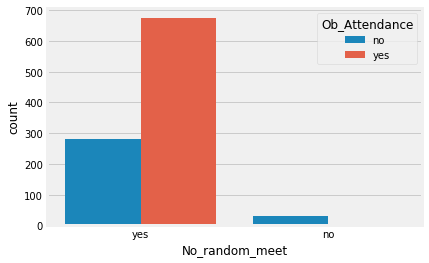

In [20]:
sns.countplot(x=interview_df.No_random_meet, hue=interview_df.Exp_Attendance)
plt.show()
sns.countplot(x=interview_df.No_random_meet, hue=interview_df.Ob_Attendance)

In [21]:
index_nan_details = interview_df['No_random_meet'][interview_df['No_random_meet'].isnull()].index
for i in index_nan_details:
    
    if (interview_df.iloc[i]['Ob_Attendance'] == 'no' and interview_df.iloc[i]['Exp_Attendance'] == 'no'):
        interview_df.iloc[i]['No_random_meet'] = 'no'
    else:
        interview_df.iloc[i]['No_random_meet'] = 'yes'

### Shared the Letter

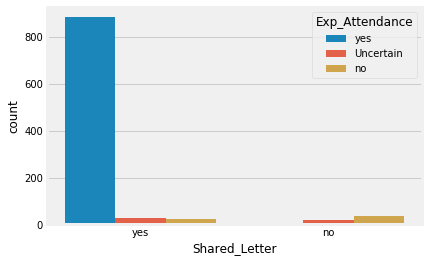

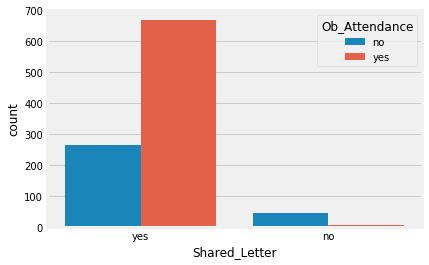

In [22]:
sns.countplot(x=interview_df.Shared_Letter, hue=interview_df.Exp_Attendance)
plt.show()
sns.countplot(x=interview_df.Shared_Letter, hue=interview_df.Ob_Attendance)

In [23]:
index_nan_details = interview_df['Shared_Letter'][interview_df['Shared_Letter'].isnull()].index
for i in index_nan_details:
    
    if (interview_df.iloc[i]['Ob_Attendance'] == 'no' or interview_df.iloc[i]['Exp_Attendance'] == 'no'):
        interview_df.iloc[i]['Shared_Letter'] = 'no'
    else:
        interview_df.iloc[i]['Shared_Letter'] = 'yes'

### Call within 3 hours

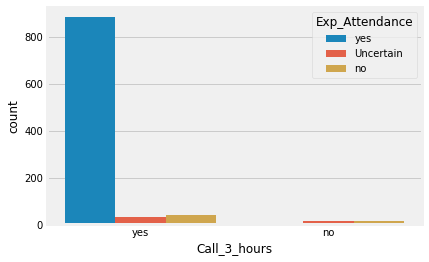

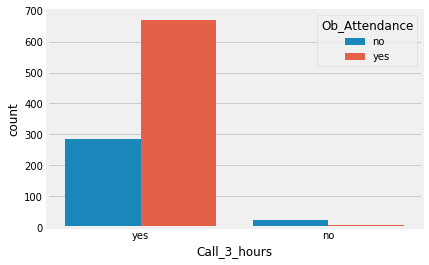

In [24]:
sns.countplot(x=interview_df.Call_3_hours, hue=interview_df.Exp_Attendance)
plt.show()
sns.countplot(x=interview_df.Call_3_hours, hue=interview_df.Ob_Attendance)

Exp_Attendence column was preferred over the Observed Attendance column (Need a better method to fill this data).

In [25]:
index_nan_details = interview_df['Call_3_hours'][interview_df['Call_3_hours'].isnull()].index
for i in index_nan_details:
    
    if (interview_df.iloc[i]['Exp_Attendance'] == 'no'):
        interview_df.iloc[i]['Call_3_hours'] = 'no'
    else:
        interview_df.iloc[i]['Call_3_hours'] = 'yes'

In [26]:
interview_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 0 to 1232
Data columns (total 18 columns):
Client                    1233 non-null object
Industry                  1233 non-null object
Location                  1233 non-null object
Position                  1233 non-null object
Interview_Type            1233 non-null object
Gender                    1233 non-null object
Curr_Location             1233 non-null object
Job_Location              1233 non-null object
Venue                     1233 non-null object
Necc_Perm                 1233 non-null object
No_random_meet            1233 non-null object
Call_3_hours              1233 non-null object
Printout_resume           1233 non-null object
Details_Clear_Landmark    1233 non-null object
Shared_Letter             1233 non-null object
Exp_Attendance            1233 non-null object
Ob_Attendance             1233 non-null object
Martial_Status            1233 non-null object
dtypes: object(18)
memory usage: 223.0+ KB


## Basic Visualization

The data was visualized to further understand the relationship between the different variables

Text(0.5,1,'Observed attendance')

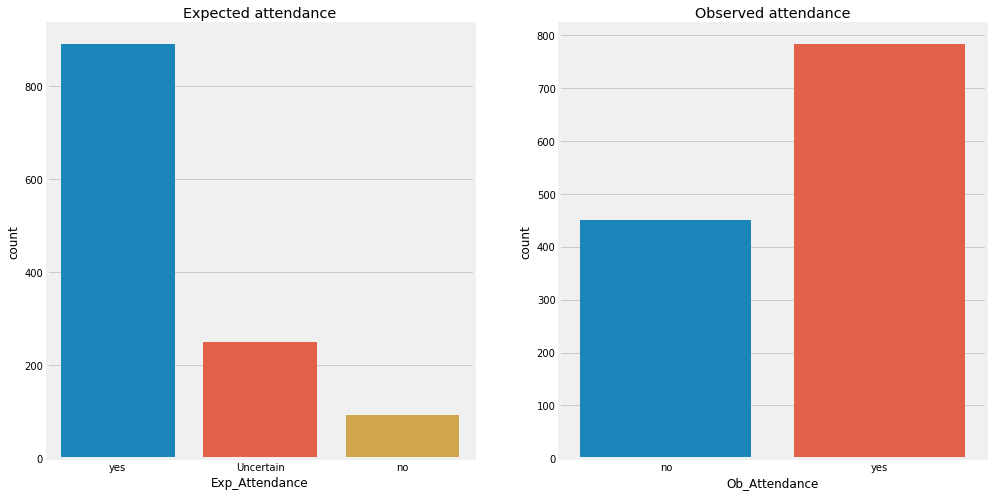

In [27]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
sns.countplot(x=interview_df.Exp_Attendance, ax=ax1)
ax1.set_title('Expected attendance')
sns.countplot(x=interview_df.Ob_Attendance, ax=ax2)
ax2.set_title('Observed attendance')

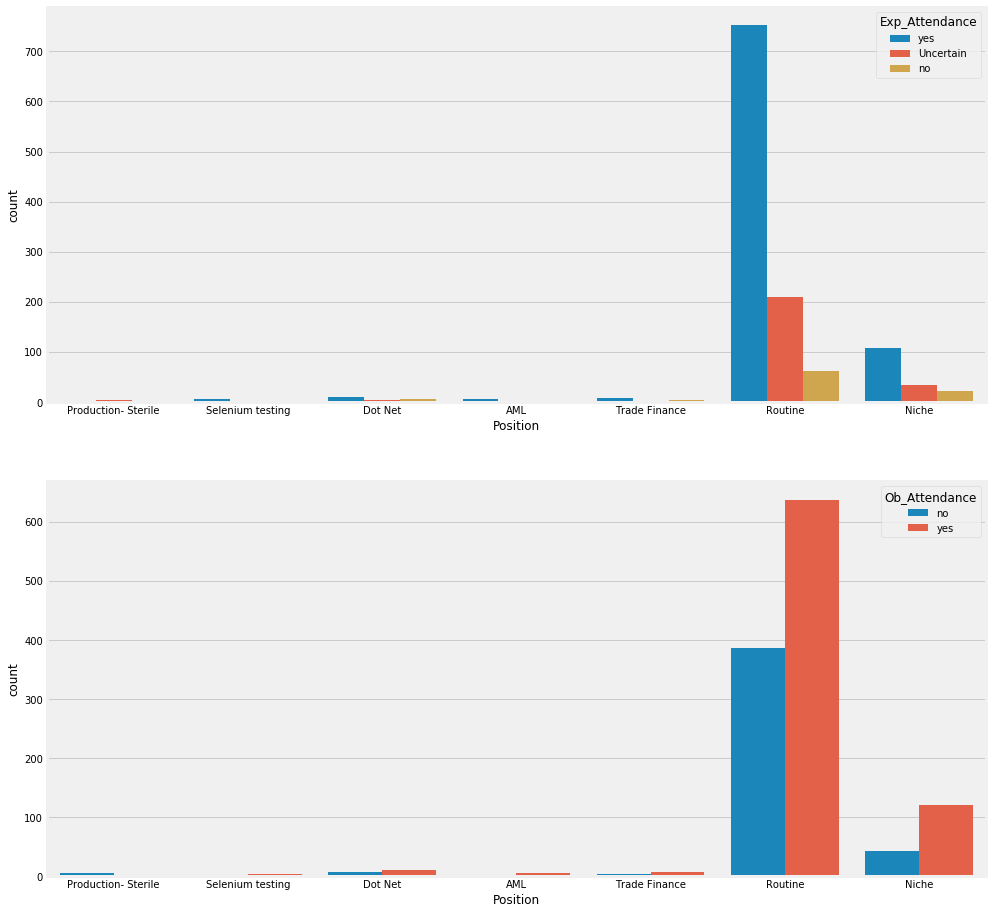

In [28]:
f, (ax1, ax2) = plt.subplots(2, figsize=(15,16))
sns.countplot(x=interview_df.Position, hue=interview_df.Exp_Attendance, ax=ax1)
sns.countplot(x=interview_df.Position, hue=interview_df.Ob_Attendance, ax=ax2)

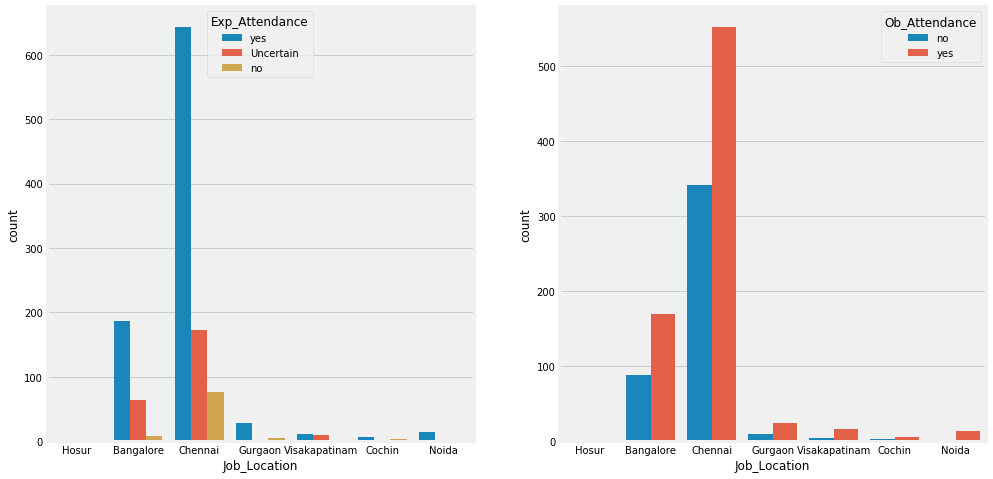

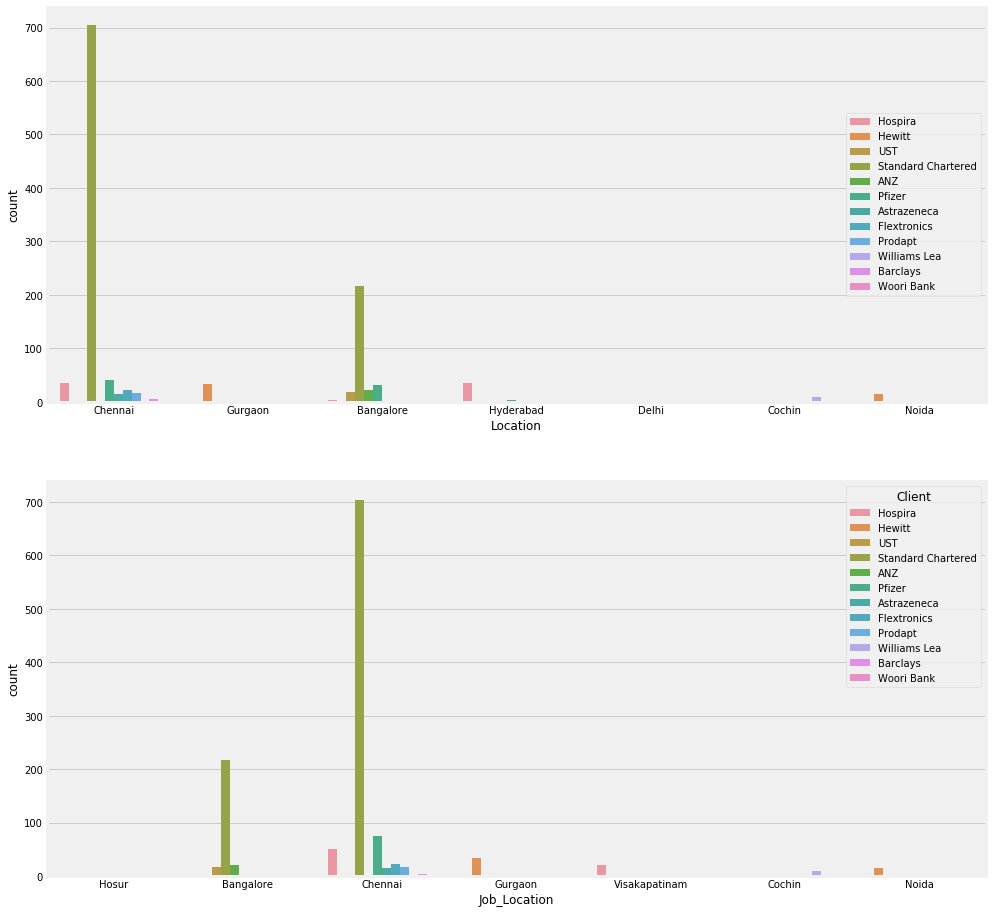

In [29]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
sns.countplot(x=interview_df.Job_Location, hue=interview_df.Exp_Attendance, ax=ax1)
sns.countplot(x=interview_df.Job_Location, hue=interview_df.Ob_Attendance, ax=ax2)
f, (ax1, ax2) = plt.subplots(2, figsize=(15,16))
sns.countplot(x=interview_df.Location, hue=interview_df.Client, ax=ax1)
ax1.legend(loc='right')
sns.countplot(x=interview_df.Job_Location, hue=interview_df.Client, ax=ax2)

* Traditional trends were seen when it came to Expected and Observed attendance.
 * Lesser people attended the interview than the expected count.
* In this dataset, more jobs were offered at Bangalore and Chennai.
* Standard Chartered offered the highest number of jobs at these locations as it had operations at both Chennai and Bangalore.

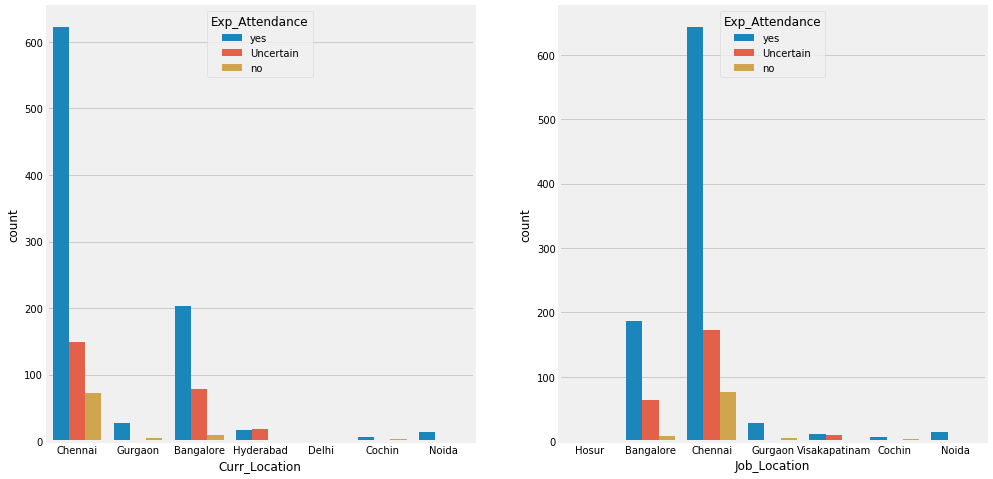

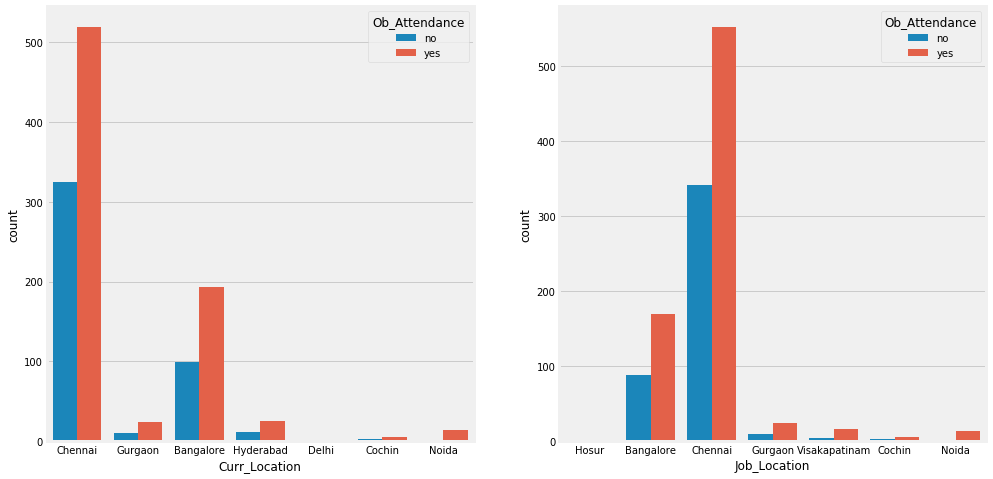

In [30]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
sns.countplot(x=interview_df.Curr_Location, hue=interview_df.Exp_Attendance, ax=ax1)
sns.countplot(x=interview_df.Job_Location, hue=interview_df.Exp_Attendance, ax=ax2)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
sns.countplot(x=interview_df.Curr_Location, hue=interview_df.Ob_Attendance, ax=ax1)
sns.countplot(x=interview_df.Job_Location, hue=interview_df.Ob_Attendance, ax=ax2)

In [31]:
interview_df.groupby(['Curr_Location', 'Job_Location', 'Exp_Attendance', 'Ob_Attendance']).size()

Curr_Location  Job_Location   Exp_Attendance  Ob_Attendance
Bangalore      Bangalore      Uncertain       no                33
                                              yes               30
                              no              no                 8
                              yes             no                46
                                              yes              140
               Chennai        Uncertain       no                 8
                                              yes                7
                              no              no                 2
                              yes             no                 1
                                              yes               14
               Visakapatinam  Uncertain       no                 1
                              yes             yes                2
Chennai        Bangalore      Uncertain       no                 1
                              yes             no                 1
  

Looking at the above graphs and the groupby data:
* People who were unsure of attending the interview had a pretty even distribution in the Observed Attendance attribute.
* People were offered higher percentage of jobs at locations that were same as their current location or were close to their current location.

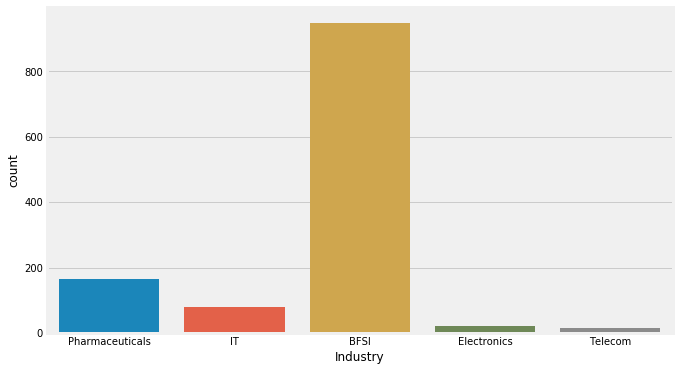

In [32]:
f, ax1 = plt.subplots(1, figsize=(10,6))
sns.countplot(x=interview_df.Industry, ax=ax1)

In [33]:
interview_df.Industry.value_counts()

BFSI               949
Pharmaceuticals    165
IT                  79
Electronics         23
Telecom             17
Name: Industry, dtype: int64

* BFSI industry offered the highest number of jobs with 949 interviews.

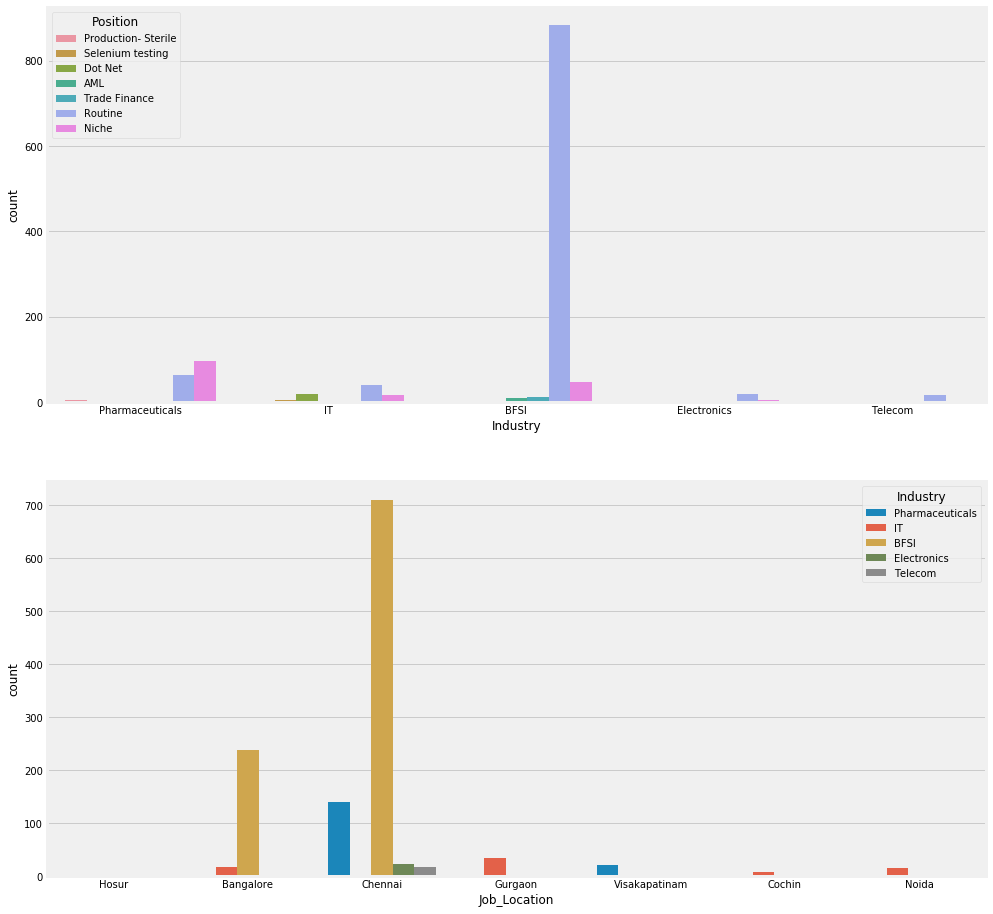

In [34]:
f, (ax1, ax2) = plt.subplots(2, figsize=(15,16))
sns.countplot(x=interview_df.Industry, hue=interview_df.Position, ax=ax1)
sns.countplot(x=interview_df.Job_Location, hue=interview_df.Industry, ax=ax2)

In [35]:
interview_df.groupby(['Industry', 'Position']).size()

Industry         Position           
BFSI             AML                      8
                 Niche                   47
                 Routine                883
                 Trade Finance           11
Electronics      Niche                    4
                 Routine                 19
IT               Dot Net                 18
                 Niche                   16
                 Routine                 40
                 Selenium testing         5
Pharmaceuticals  Niche                   96
                 Production- Sterile      5
                 Routine                 64
Telecom          Routine                 17
dtype: int64

* There were a lot of routine jobs offered across every industry.

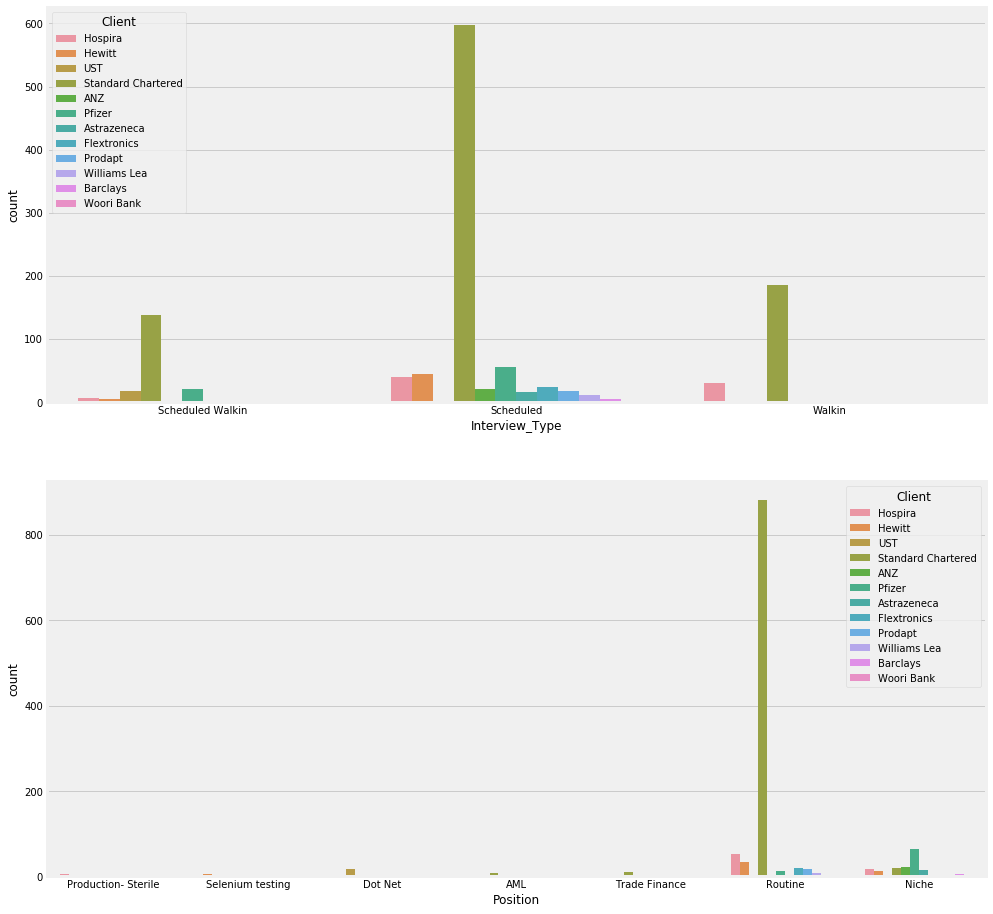

In [36]:
f, (ax1, ax2) = plt.subplots(2, figsize=(15,16))
sns.countplot(x=interview_df.Interview_Type, hue=interview_df.Client, ax=ax1)
sns.countplot(x=interview_df.Position, hue=interview_df.Client, ax=ax2)

In [37]:
interview_df.groupby(['Industry', 'Client', 'Position']).size()

Industry         Client              Position           
BFSI             ANZ                 Niche                   22
                 Barclays            Niche                    5
                 Standard Chartered  AML                      8
                                     Niche                   20
                                     Routine                882
                                     Trade Finance           11
                 Woori Bank          Routine                  1
Electronics      Flextronics         Niche                    4
                                     Routine                 19
IT               Hewitt              Niche                   12
                                     Routine                 33
                                     Selenium testing         5
                 UST                 Dot Net                 18
                 Williams Lea        Niche                    4
                                     Routine   

* Standard Chartered conducted quite a lot of interviews and the *Routine* position took the lion share.
* The same was seen across most companies.

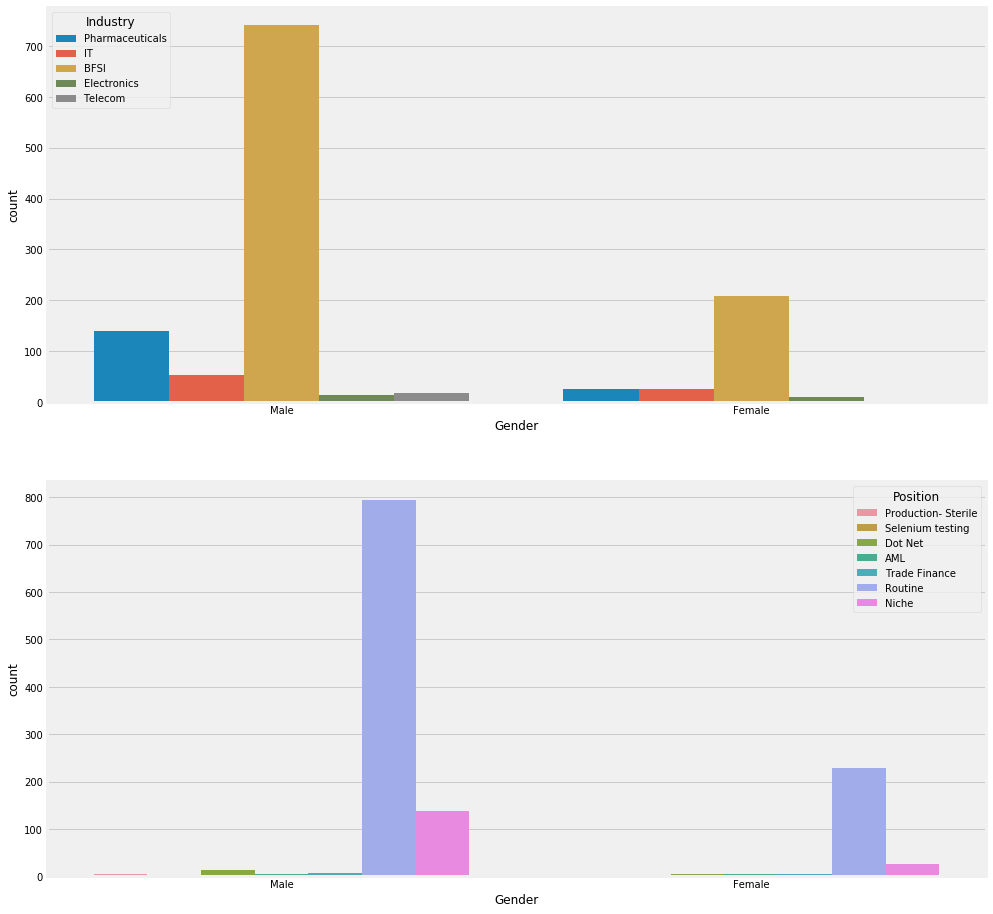

In [38]:
f, (ax1, ax2) = plt.subplots(2, figsize=(15,16))
sns.countplot(x=interview_df.Gender, hue=interview_df.Industry, ax=ax1)
sns.countplot(x=interview_df.Gender, hue=interview_df.Position, ax=ax2)

In [39]:
interview_df.groupby(['Gender', 'Industry', 'Position']).size()

Gender  Industry         Position           
Female  BFSI             AML                      4
                         Niche                   10
                         Routine                189
                         Trade Finance            5
        Electronics      Niche                    1
                         Routine                  8
        IT               Dot Net                  4
                         Niche                    4
                         Routine                 16
                         Selenium testing         2
        Pharmaceuticals  Niche                   10
                         Routine                 15
Male    BFSI             AML                      4
                         Niche                   37
                         Routine                694
                         Trade Finance            6
        Electronics      Niche                    3
                         Routine                 11
        IT         

* The dataset contains a higher number of male candidates than female candidates. However, the distibution of jobs offered across industry was pretty similar.

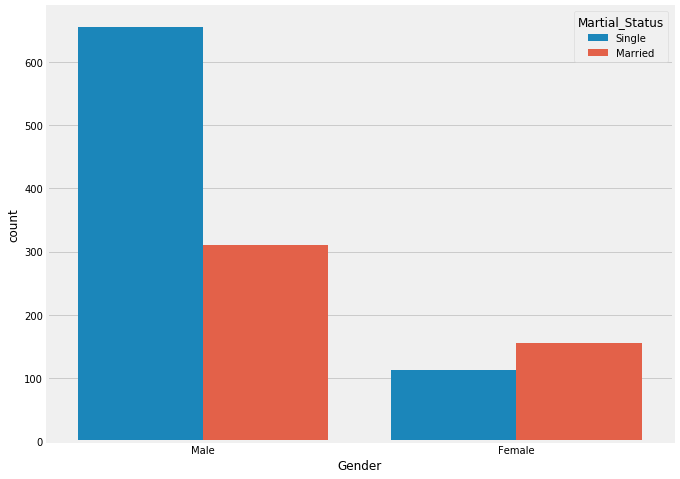

In [40]:
f , ax = plt.subplots(1, figsize=(10,8)) 
sns.countplot(x=interview_df.Gender, hue=interview_df.Martial_Status, ax=ax)

* plots the interview type with respect to gender

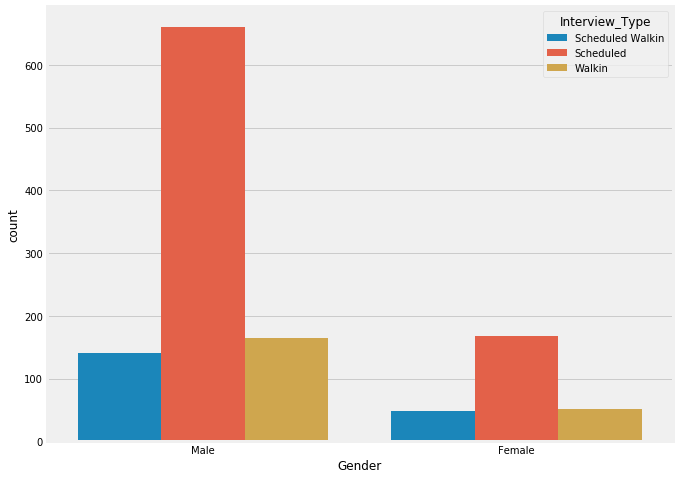

In [41]:
f , ax = plt.subplots(1, figsize=(10,8)) 
sns.countplot(x=interview_df.Gender, hue=interview_df.Interview_Type, ax=ax)

* A higher number of female candiates were married compared to male candidates.
* However, when it came to expected attendance and observed attendance, the disribution was pretty similar.

In [42]:
le = LabelEncoder()
interview_df = interview_df.apply(le.fit_transform)

In [43]:
interview_df.head(10)

,Client,Industry,Location,Position,Interview_Type,Gender,Curr_Location,Job_Location,Venue,Necc_Perm,No_random_meet,Call_3_hours,Printout_resume,Details_Clear_Landmark,Shared_Letter,Exp_Attendance,Ob_Attendance,Martial_Status
0,5,3,1,3,1,1,1,4,4,1,1,1,1,1,1,2,0,1
1,5,3,1,3,1,1,1,0,4,1,1,1,1,1,1,2,0,1
2,5,3,1,3,1,1,1,1,4,1,0,1,1,1,0,0,0,1
3,5,3,1,3,1,1,1,1,4,1,1,0,0,1,1,0,0,1
4,5,3,1,3,1,1,1,0,4,1,1,1,1,1,1,0,0,0
5,4,2,4,5,1,1,4,3,3,1,1,1,1,1,1,2,1,1
6,4,2,4,5,1,1,4,3,3,1,1,1,1,1,1,2,1,1
7,4,2,4,5,1,0,4,3,3,1,1,1,1,1,1,2,1,1
8,4,2,4,5,1,1,4,3,3,1,1,1,1,1,1,2,1,1
9,4,2,4,5,1,0,4,3,3,1,1,1,1,1,1,2,0,1


In [44]:
for column in interview_df.columns:
    print(column, interview_df[column].unique())
    print('-'*40)

Client [ 5  4  9  8  0  6  1  3  7 10  2 11]
----------------------------------------
Industry [3 2 0 1 4]
----------------------------------------
Location [1 4 0 5 3 2 6]
----------------------------------------
Position [3 5 1 0 6 4 2]
----------------------------------------
Interview_Type [1 0 2]
----------------------------------------
Gender [1 0]
----------------------------------------
Curr_Location [1 4 0 5 3 2 6]
----------------------------------------
Job_Location [4 0 1 3 6 2 5]
----------------------------------------
Venue [4 3 0 1 5 2 6]
----------------------------------------
Necc_Perm [1 0]
----------------------------------------
No_random_meet [1 0]
----------------------------------------
Call_3_hours [1 0]
----------------------------------------
Printout_resume [1 0]
----------------------------------------
Details_Clear_Landmark [1 0]
----------------------------------------
Shared_Letter [1 0]
----------------------------------------
Exp_Attendance [2 0 1]
--

# Finding Correlation

In [45]:
interview_df.corr()

,Client,Industry,Location,Position,Interview_Type,Gender,Curr_Location,Job_Location,Venue,Necc_Perm,No_random_meet,Call_3_hours,Printout_resume,Details_Clear_Landmark,Shared_Letter,Exp_Attendance,Ob_Attendance,Martial_Status
Client,1.000000,-0.528438,-0.345988,0.393685,0.136774,0.007737,-0.345988,-0.309218,-0.348465,0.020092,0.055813,0.069578,0.045282,0.044577,0.026534,0.027339,-0.052294,0.059982
Industry,-0.528438,1.000000,0.408825,-0.438471,-0.064043,0.043747,0.408825,0.406560,0.451366,-0.155962,-0.159994,-0.125938,-0.133119,-0.104432,-0.072503,-0.073847,-0.045867,-0.154582
Location,-0.345988,0.408825,1.000000,-0.076200,-0.230447,-0.044242,1.000000,0.801504,0.917997,-0.004533,-0.013185,-0.032369,-0.048927,-0.018388,0.016722,-0.007861,0.045244,-0.021872
Position,0.393685,-0.438471,-0.076200,1.000000,0.110018,-0.043870,-0.076200,0.018910,-0.083093,0.139269,0.074401,0.027415,0.053604,0.034881,0.029062,0.044585,-0.048733,0.036988
Interview_Type,0.136774,-0.064043,-0.230447,0.110018,1.000000,-0.040661,-0.230447,-0.222331,-0.231091,-0.024459,-0.053124,-0.067643,-0.054003,-0.069321,-0.031099,-0.012073,-0.089922,0.036053
Gender,0.007737,0.043747,-0.044242,-0.043870,-0.040661,1.000000,-0.044242,-0.031349,-0.022760,0.045390,-0.001826,0.001893,0.020848,0.007581,0.027331,0.012409,0.004860,0.221883
Curr_Location,-0.345988,0.408825,1.000000,-0.076200,-0.230447,-0.044242,1.000000,0.801504,0.917997,-0.004533,-0.013185,-0.032369,-0.048927,-0.018388,0.016722,-0.007861,0.045244,-0.021872
Job_Location,-0.309218,0.406560,0.801504,0.018910,-0.222331,-0.031349,0.801504,1.000000,0.852928,0.005711,-0.023917,-0.020546,-0.046338,0.004464,0.013956,0.001258,0.050968,-0.019708
Venue,-0.348465,0.451366,0.917997,-0.083093,-0.231091,-0.022760,0.917997,0.852928,1.000000,0.004066,-0.035297,-0.042532,-0.049903,-0.015187,0.006388,-0.027394,0.033752,-0.052371
Necc_Perm,0.020092,-0.155962,-0.004533,0.139269,-0.024459,0.045390,-0.004533,0.005711,0.004066,1.000000,0.754622,0.679209,0.756972,0.718898,0.490270,0.262491,0.337195,0.030664


# Generating the Heat Map

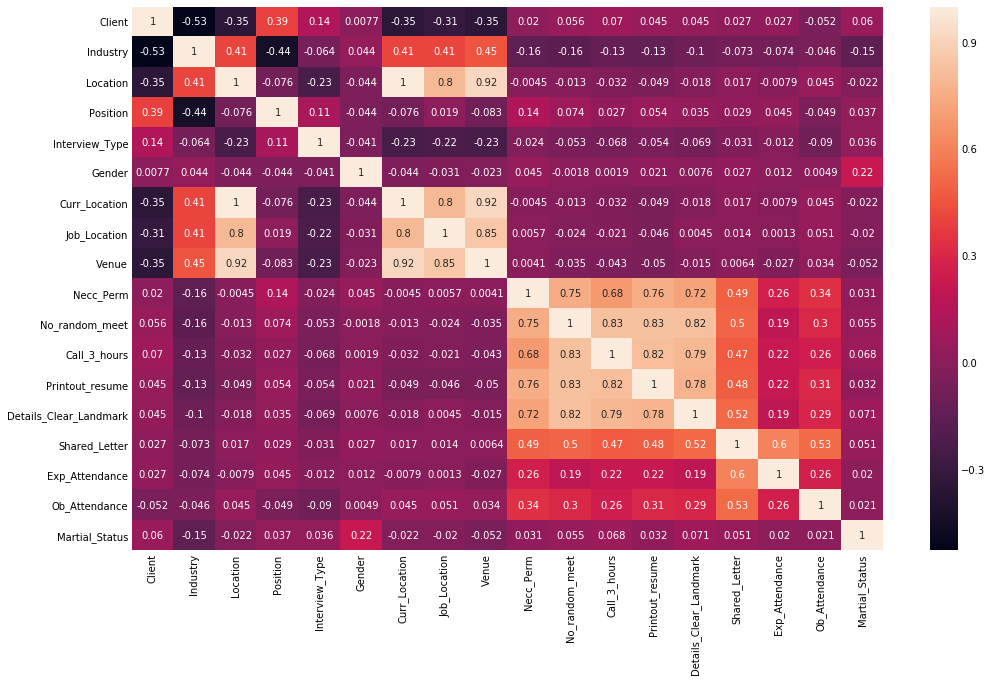

In [46]:
f , ax = plt.subplots(1, figsize=(15,10)) 
sns.heatmap(interview_df.corr(), ax=ax, annot=True)

* The heatmap shows the relationships that were protrayed earlier:
    * Current Location, Job Location and Venue were highly correlated.
    * Industry and Client were also correlated.
* Necc_Perm, Call_3_hours, Printout_resume, Details_Clear_Landmark, Shared_Letter were also highly correlated.

** Necc_Perm, Call_3_hours, Printout_resume, Details_Clear_Landmark, Shared_Letter columns could be reduced to a single column using dimensionality reduction techniques such as PCA **

# Pairplotting

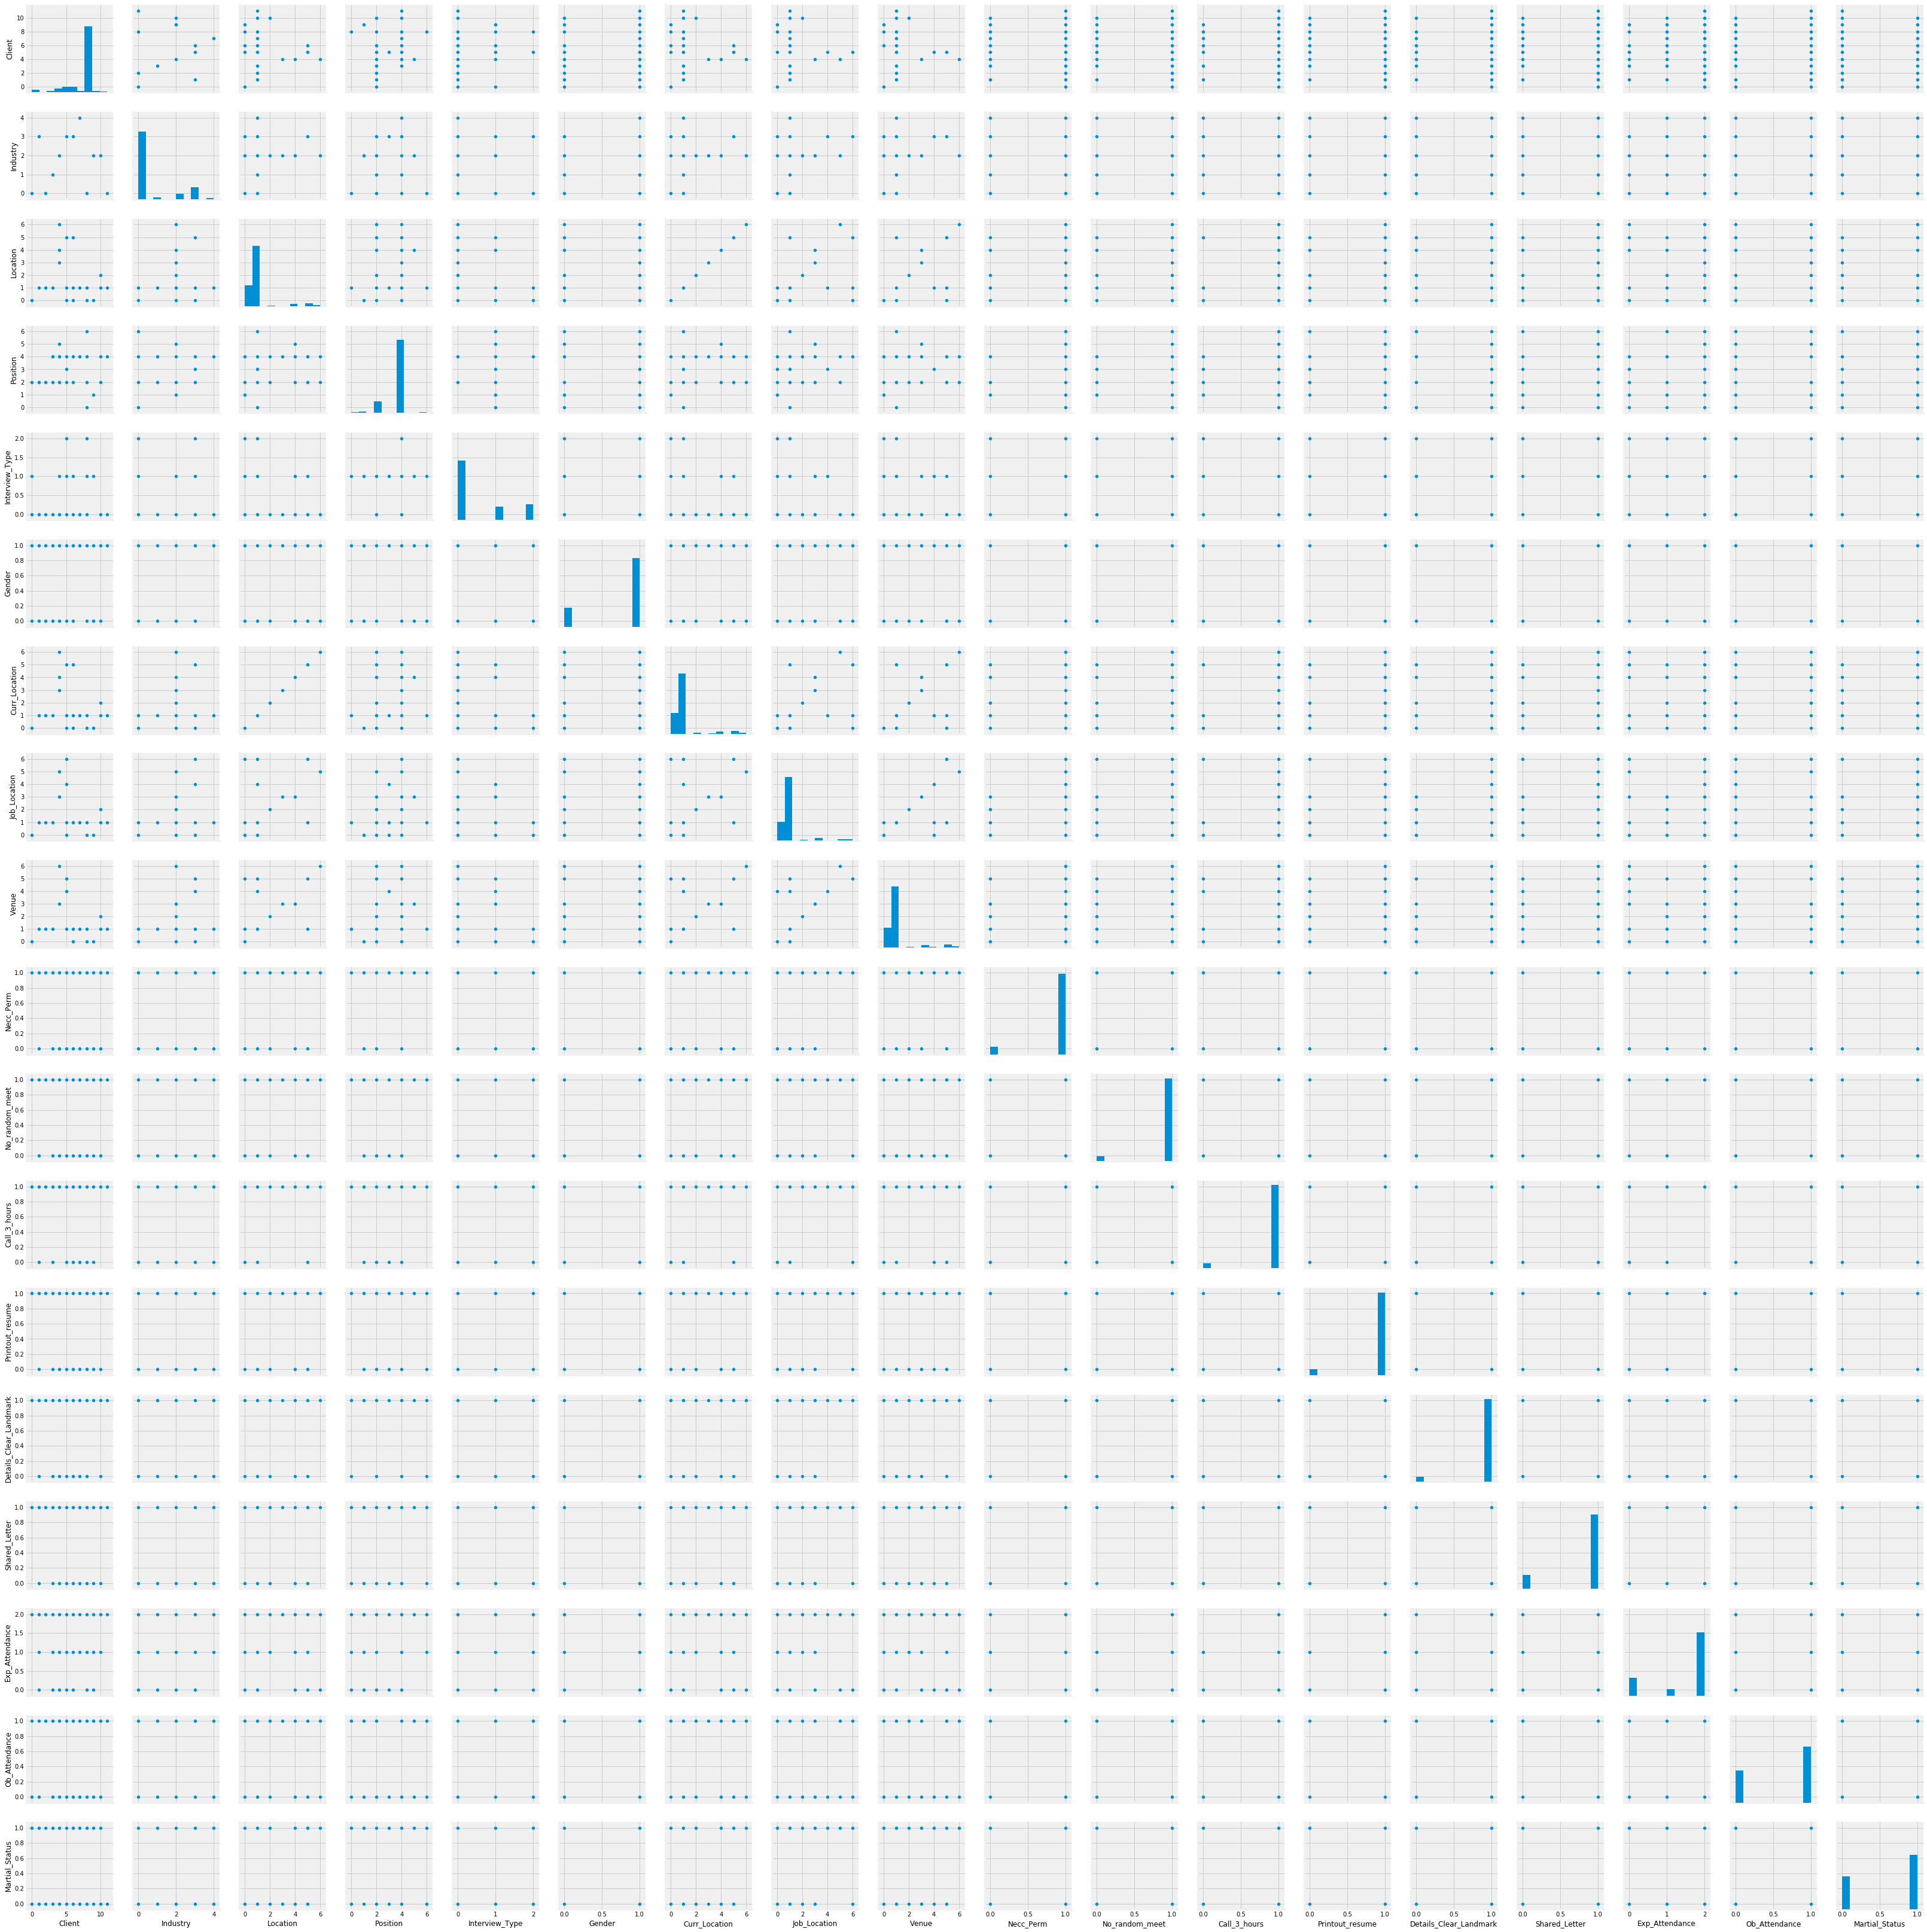

In [47]:
sns.pairplot(interview_df)

# Training and Testing Data

In [48]:
X=interview_df[['Client','Industry','Location','Position','Interview_Type','Gender','Curr_Location','Job_Location','Venue','Necc_Perm','No_random_meet','Call_3_hours','Printout_resume','Details_Clear_Landmark','Shared_Letter','Exp_Attendance','Martial_Status']]
y=interview_df['Ob_Attendance']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=500)

# Applying Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions1=logmodel.predict(X_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions1))

             precision    recall  f1-score   support

          0       0.87      0.47      0.61       178
          1       0.76      0.96      0.85       316

avg / total       0.80      0.78      0.76       494



In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions1))

[[ 84  94]
 [ 13 303]]


# Applying Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
predictions2 = dtree.predict(X_test)

In [56]:
print(classification_report(y_test,predictions2))

             precision    recall  f1-score   support

          0       0.88      0.49      0.63       178
          1       0.77      0.96      0.86       316

avg / total       0.81      0.79      0.77       494



In [57]:
print(confusion_matrix(y_test,predictions2))

[[ 87  91]
 [ 12 304]]


# Applying Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rfc = RandomForestClassifier(n_estimators=600)

In [60]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
predictions3 = rfc.predict(X_test)

In [62]:
print(classification_report(y_test,predictions3))

             precision    recall  f1-score   support

          0       0.89      0.48      0.63       178
          1       0.77      0.97      0.86       316

avg / total       0.81      0.79      0.77       494



In [63]:
print(confusion_matrix(y_test,predictions3))

[[ 86  92]
 [ 11 305]]


# Accuracy for Logistic Model

In [64]:
from sklearn.metrics import accuracy_score
print('Accuracy : %2f'%accuracy_score(y_test,predictions1))

Accuracy : 0.783401


# Accuracy for Random Tree

In [65]:
from sklearn.metrics import accuracy_score
print('Accuracy : %2f'%accuracy_score(y_test,predictions2))

Accuracy : 0.791498


# Accuracy for Decision Tree

In [66]:
from sklearn.metrics import accuracy_score
print('Accuracy : %2f'%accuracy_score(y_test,predictions3))

Accuracy : 0.791498


# ROC Curve for Logistic Model

In [67]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions1)
roc_auc = metrics.roc_auc_score(y_test, predictions1)


Text(0,0.5,'True Positive Rate')

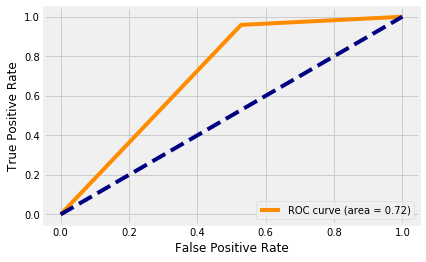

In [68]:
plt.plot(fpr, tpr, color = 'darkorange',
        label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ROC Curve for Random Forest

In [69]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions2)
roc_auc = metrics.roc_auc_score(y_test, predictions2)

Text(0,0.5,'True Positive Rate')

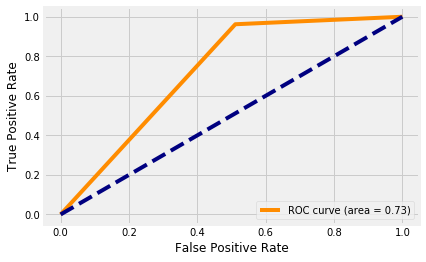

In [70]:
plt.plot(fpr, tpr, color = 'darkorange',
        label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ROC Curve for Decision Tree

Text(0,0.5,'True Positive Rate')

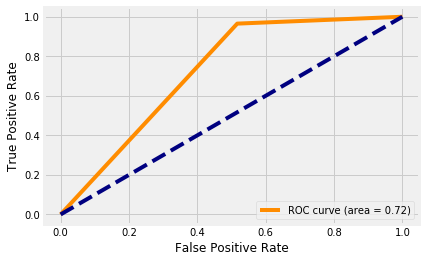

In [71]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions3)
roc_auc = metrics.roc_auc_score(y_test, predictions3)
plt.plot(fpr, tpr, color = 'darkorange',
        label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

# Cross Validation

In [72]:
from sklearn.cross_validation import cross_val_score,cross_val_predict 
from sklearn import metrics

C:\Users\Sharik\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [73]:
from sklearn.model_selection import KFold

In [74]:
kFold = KFold(n_splits=10, shuffle=True, random_state=None)
for train_index, test_index in kFold.split(interview_df):
    train_data = interview_df.iloc[train_index]
    test_data = interview_df.iloc[test_index]

In [75]:
print('Score:',logmodel.score(X_test,y_test))

Score: 0.7834008097165992


In [76]:
scores=cross_val_score(logmodel,interview_df,y,cv=6)
print('Cross validated scores:',scores)

Cross validated scores: [1. 1. 1. 1. 1. 1.]


In [77]:
results=cross_val_score(logmodel,X,y,cv=6)
print(results.mean())

0.7745125897860919


# Cross Predicted Accuracy for Logistic Model

In [78]:
accuracy=metrics.r2_score(y_test,predictions1)
print('Cross Predicted Accuracy',accuracy)

Cross Predicted Accuracy 0.06026880955767322


# Cross Predicted Accuracy for Random Forest

In [79]:
accuracy=metrics.r2_score(y_test,predictions2)
print('Cross Predicted Accuracy',accuracy)

Cross Predicted Accuracy 0.09539894751813405


# Cross Predicted Accuracy for Decision Tree

In [80]:
accuracy=metrics.r2_score(y_test,predictions3)
print('Cross Predicted Accuracy',accuracy)

Cross Predicted Accuracy 0.09539894751813405


# Displaying Decision Tree

In [81]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot
features = list(interview_df.columns[1:])
features

['Industry',
 'Location',
 'Position',
 'Interview_Type',
 'Gender',
 'Curr_Location',
 'Job_Location',
 'Venue',
 'Necc_Perm',
 'No_random_meet',
 'Call_3_hours',
 'Printout_resume',
 'Details_Clear_Landmark',
 'Shared_Letter',
 'Exp_Attendance',
 'Ob_Attendance',
 'Martial_Status']

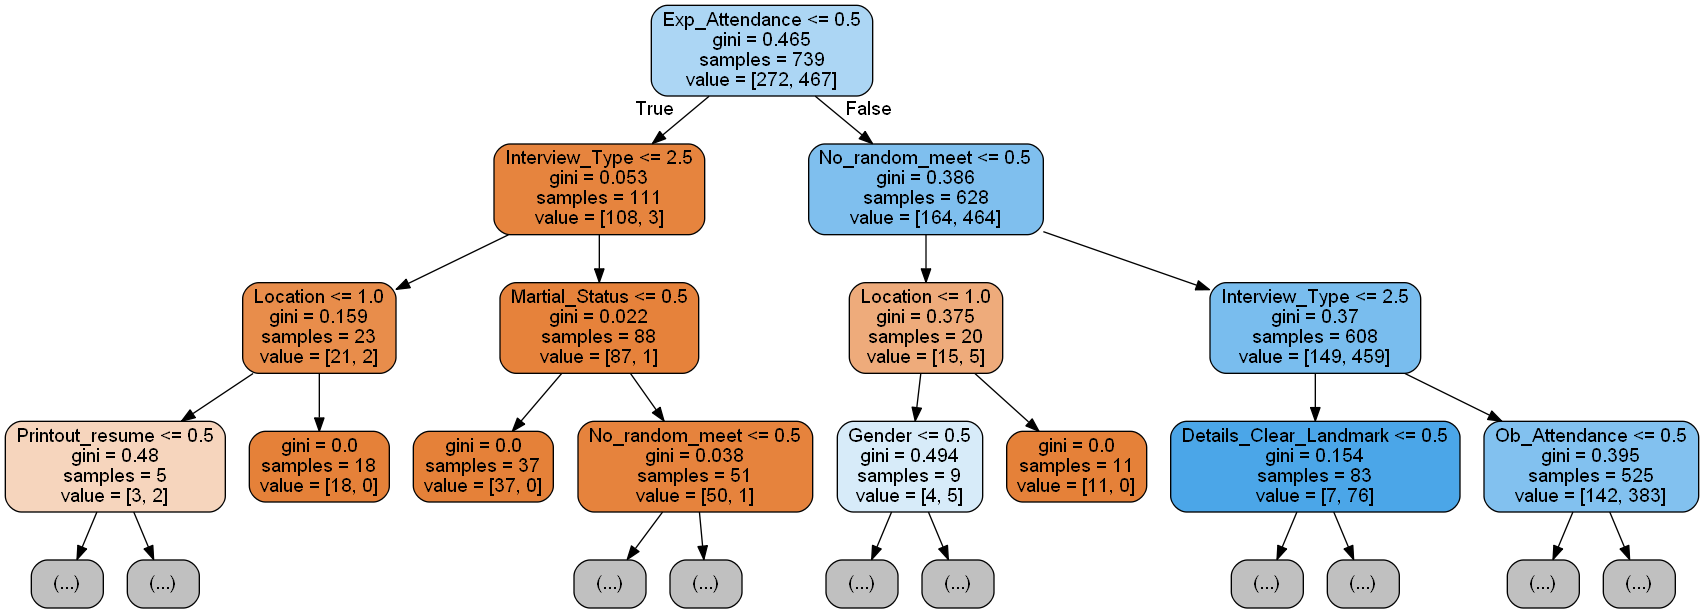

In [82]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,max_depth=3,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())